In [2]:
#1.Data Cleaning and Preparation 

In [4]:
#Load the dataset
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
df = pd.read_csv("Cardiotocographic.csv")

In [6]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [8]:
df.shape

(2126, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [12]:
#Handle Missing Value
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [14]:
df.fillna(df.mean(),inplace=True)

In [16]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [18]:
#Check Datatype
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [20]:
#Detect and treat outliers 
def treat_outliers(df, column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    IQR
    upper_extreme=q3+1.5*IQR
    upper_extreme
    lower_extreme=q1-1.5*IQR
    lower_extreme
    df[column] = np.where(df[column] < lower_extreme, lower_extreme, df[column])
    df[column] = np.where(df[column] > upper_extreme, upper_extreme, df[column])
    return df

In [22]:
for column in df.columns:
    df = treat_outliers(df, column)

In [24]:
#2. Statistical Summary

In [26]:
summary_stats=df.describe().T[['mean','50%','std']].rename(columns={'mean': 'Mean', '50%':'Median','std': 'Standard Deviation'})
summary_stats['IQR']=df.quantile(0.75) - df.quantile(0.25)
summary_stats.round(2)

Mean  Median  Standard Deviation    IQR
LB        133.29   133.0                9.93  14.00
AC          0.00     0.0                0.00   0.01
FM          0.00     0.0                0.00   0.00
UC          0.00     0.0                0.00   0.00
DL          0.00     0.0                0.00   0.00
DS          0.00     0.0                0.00   0.00
DP          0.00     0.0                0.00   0.00
ASTV       46.98    49.0               17.61  29.00
MSTV        1.30     1.2                0.78   1.00
ALTV        6.69     0.0               10.38  11.00
MLTV        8.02     7.5                5.05   6.20
Width      70.32    68.0               39.57  63.00
Tendency    0.32     0.0                0.62   1.00
NSP         1.00     1.0                0.00   0.00

In [28]:
#Interesting Findings

In [30]:
#Right-Skewed data ->  ALTV, FM, AC 
#Low-variance features ->  UC, DL, DS, DP
#Normally distributed values -> LB
#Target class imbalance -> NSP
#High spread -> Width

In [32]:
#3.Data Visualization

In [34]:
#Histogram
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

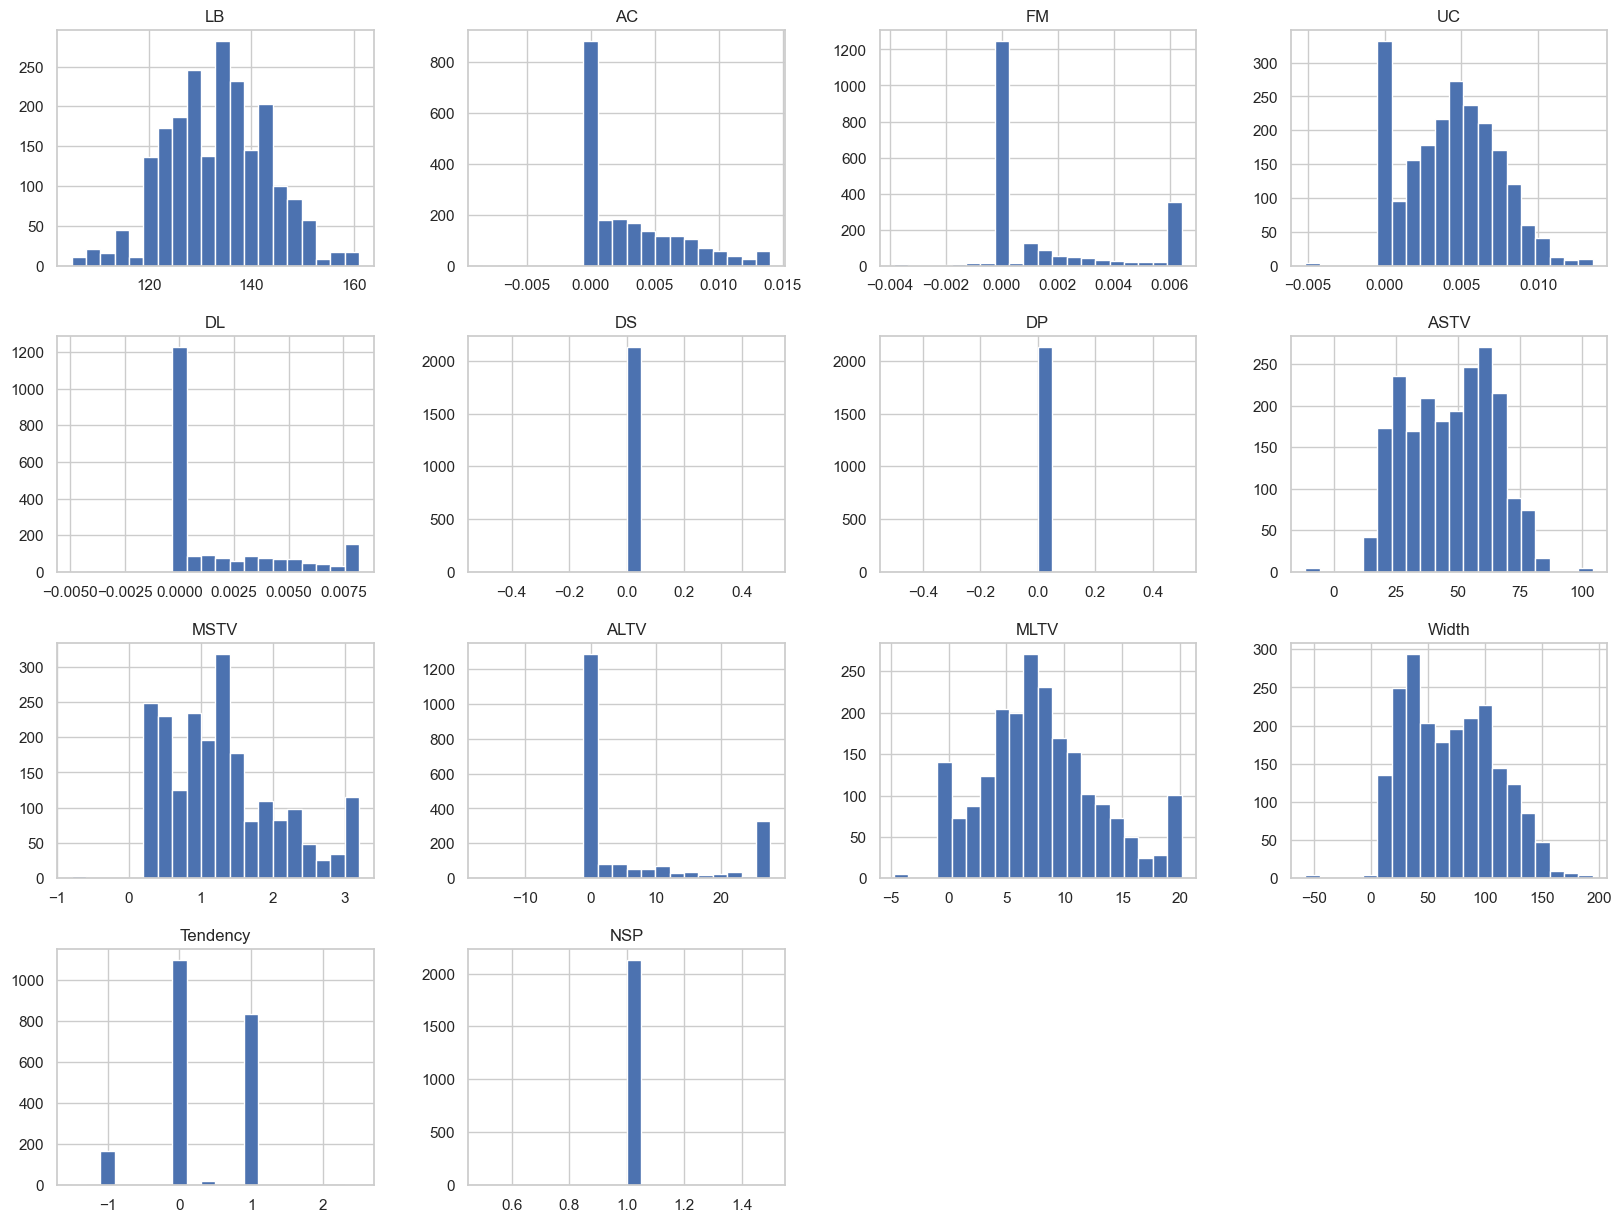

In [35]:
df.hist(bins=20, figsize=(20,15))
plt.show()

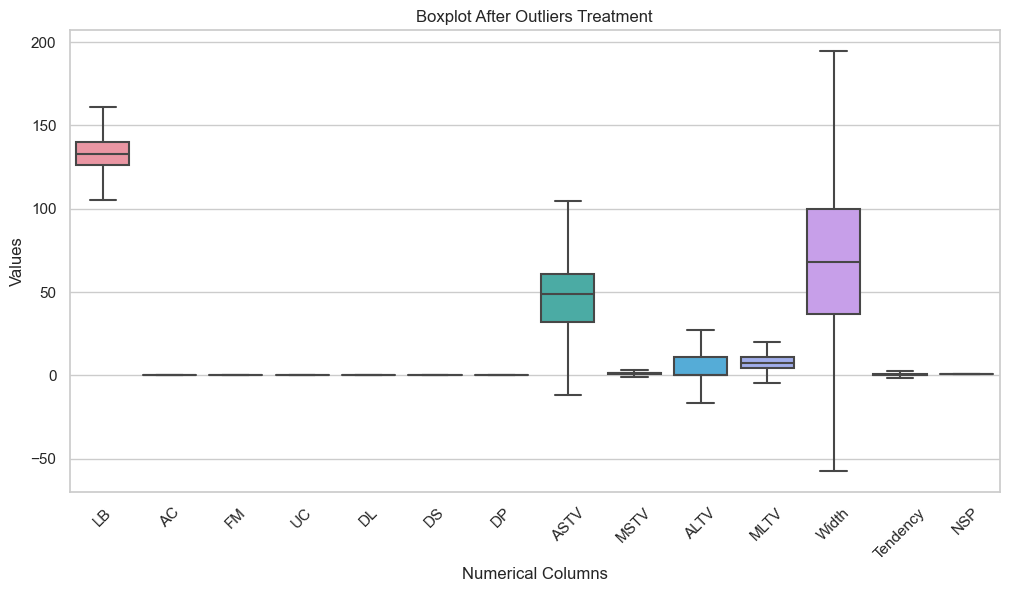

In [36]:
#Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot After Outliers Treatment")
plt.xlabel("Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

<Axes: >

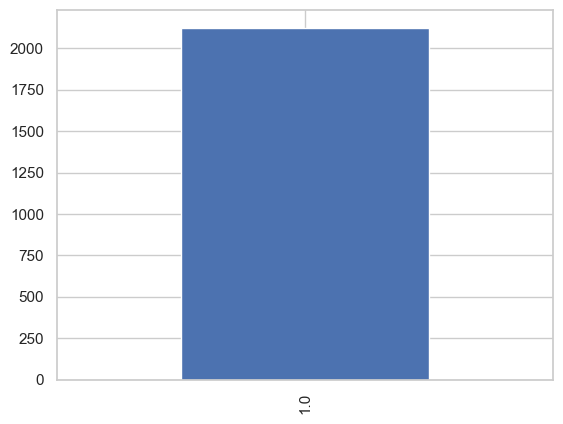

In [37]:
#Barplot
df['NSP'].value_counts().plot.bar()

<Axes: ylabel='NSP'>

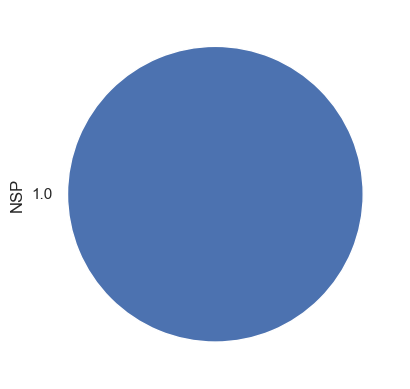

In [39]:
#Piechart
df.NSP.value_counts().plot(kind="pie")

In [40]:
df["NSP"].value_counts()

1.0    2126
Name: NSP, dtype: int64

Scatterplot:


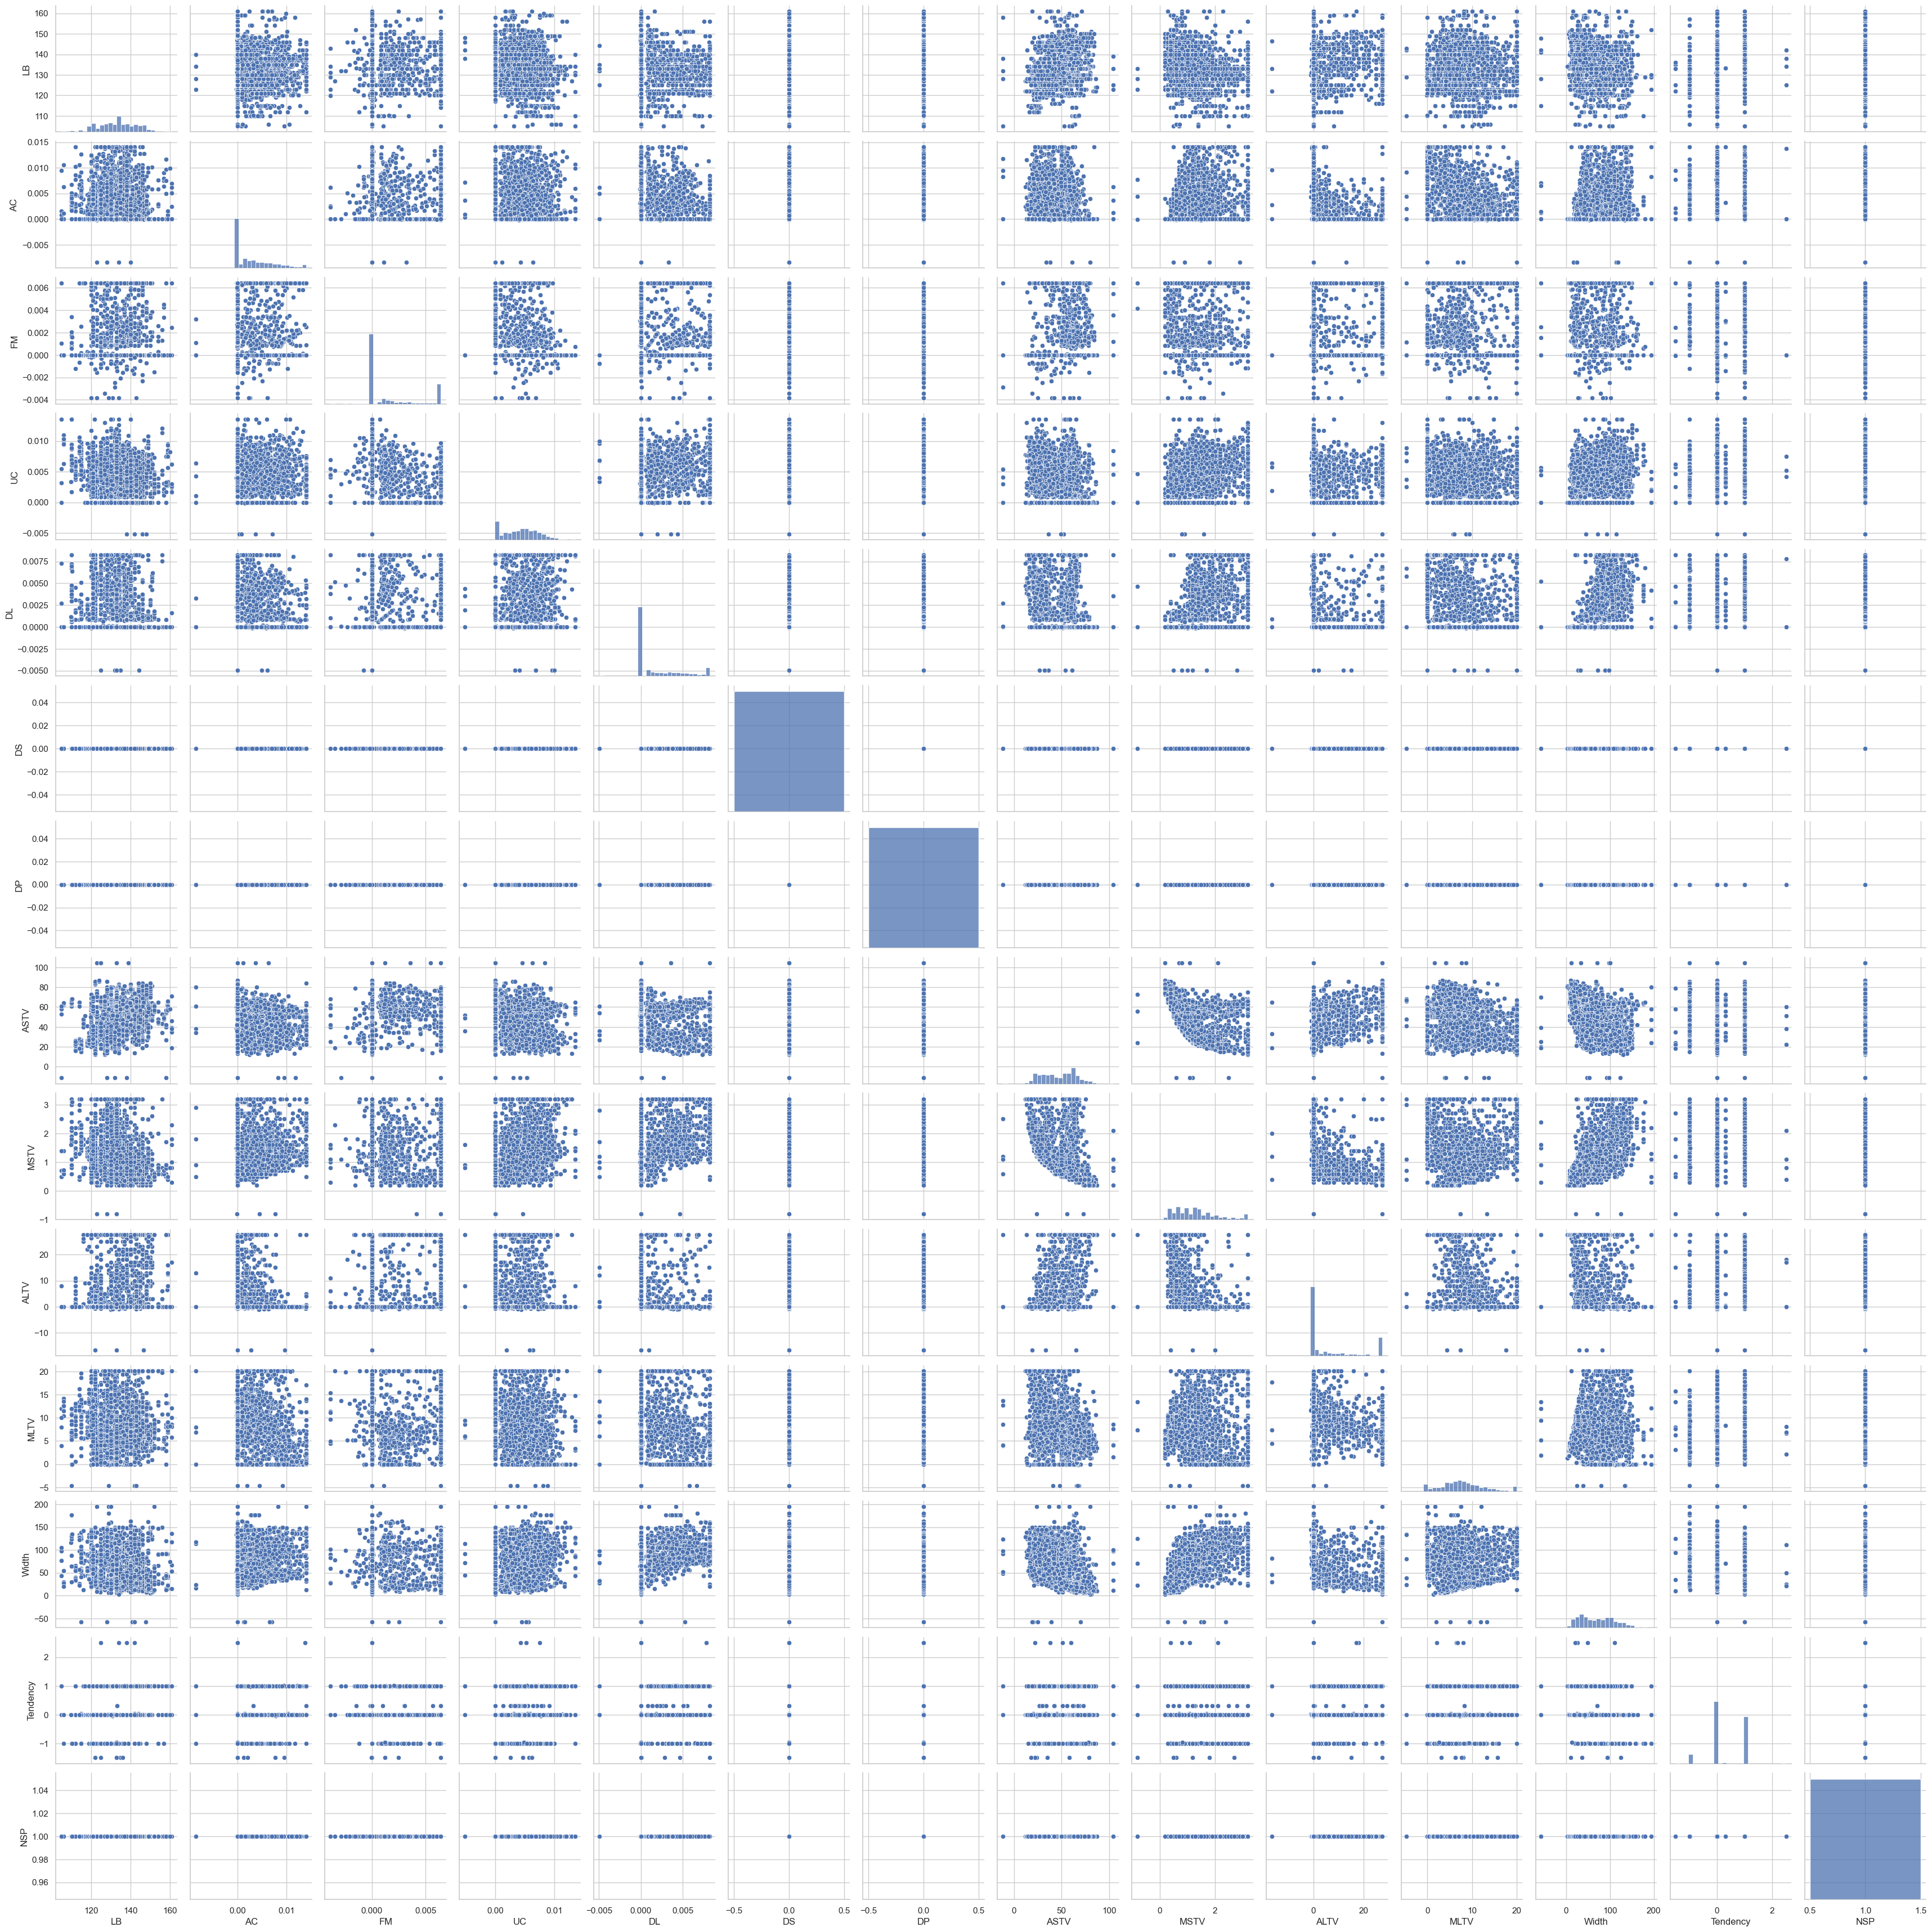

In [56]:
#Scatter Plot
sns.pairplot(df)
print("Scatterplot:")
plt.show()

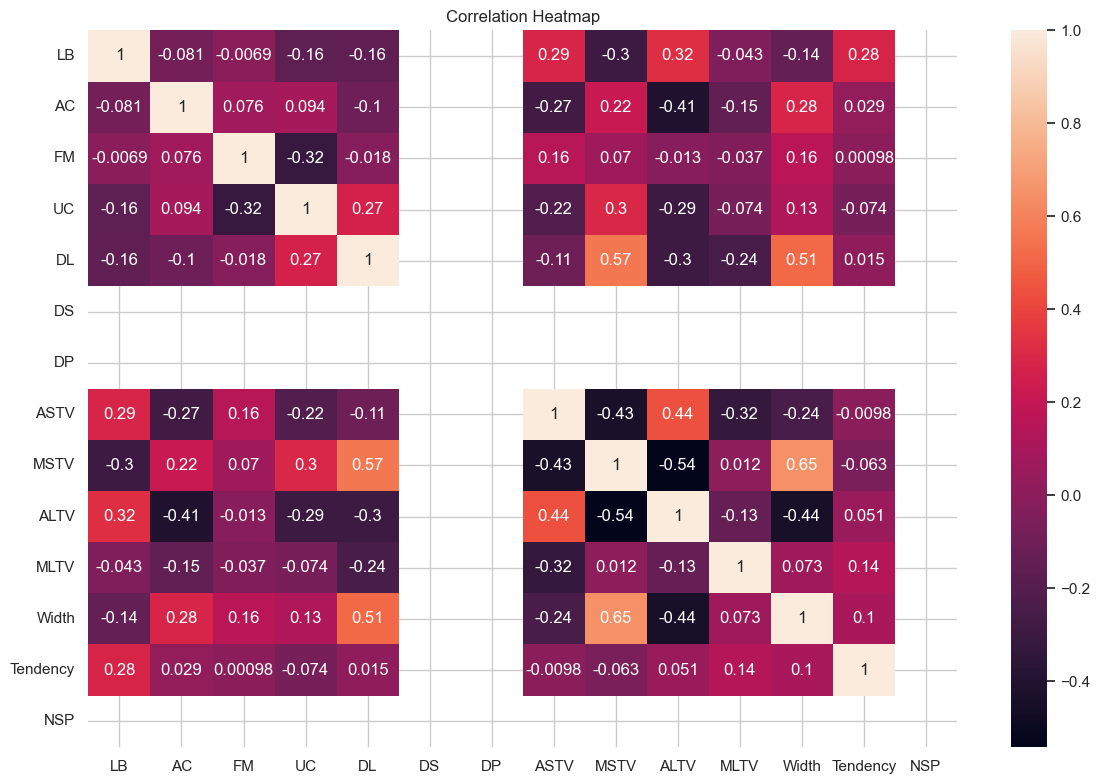

In [66]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

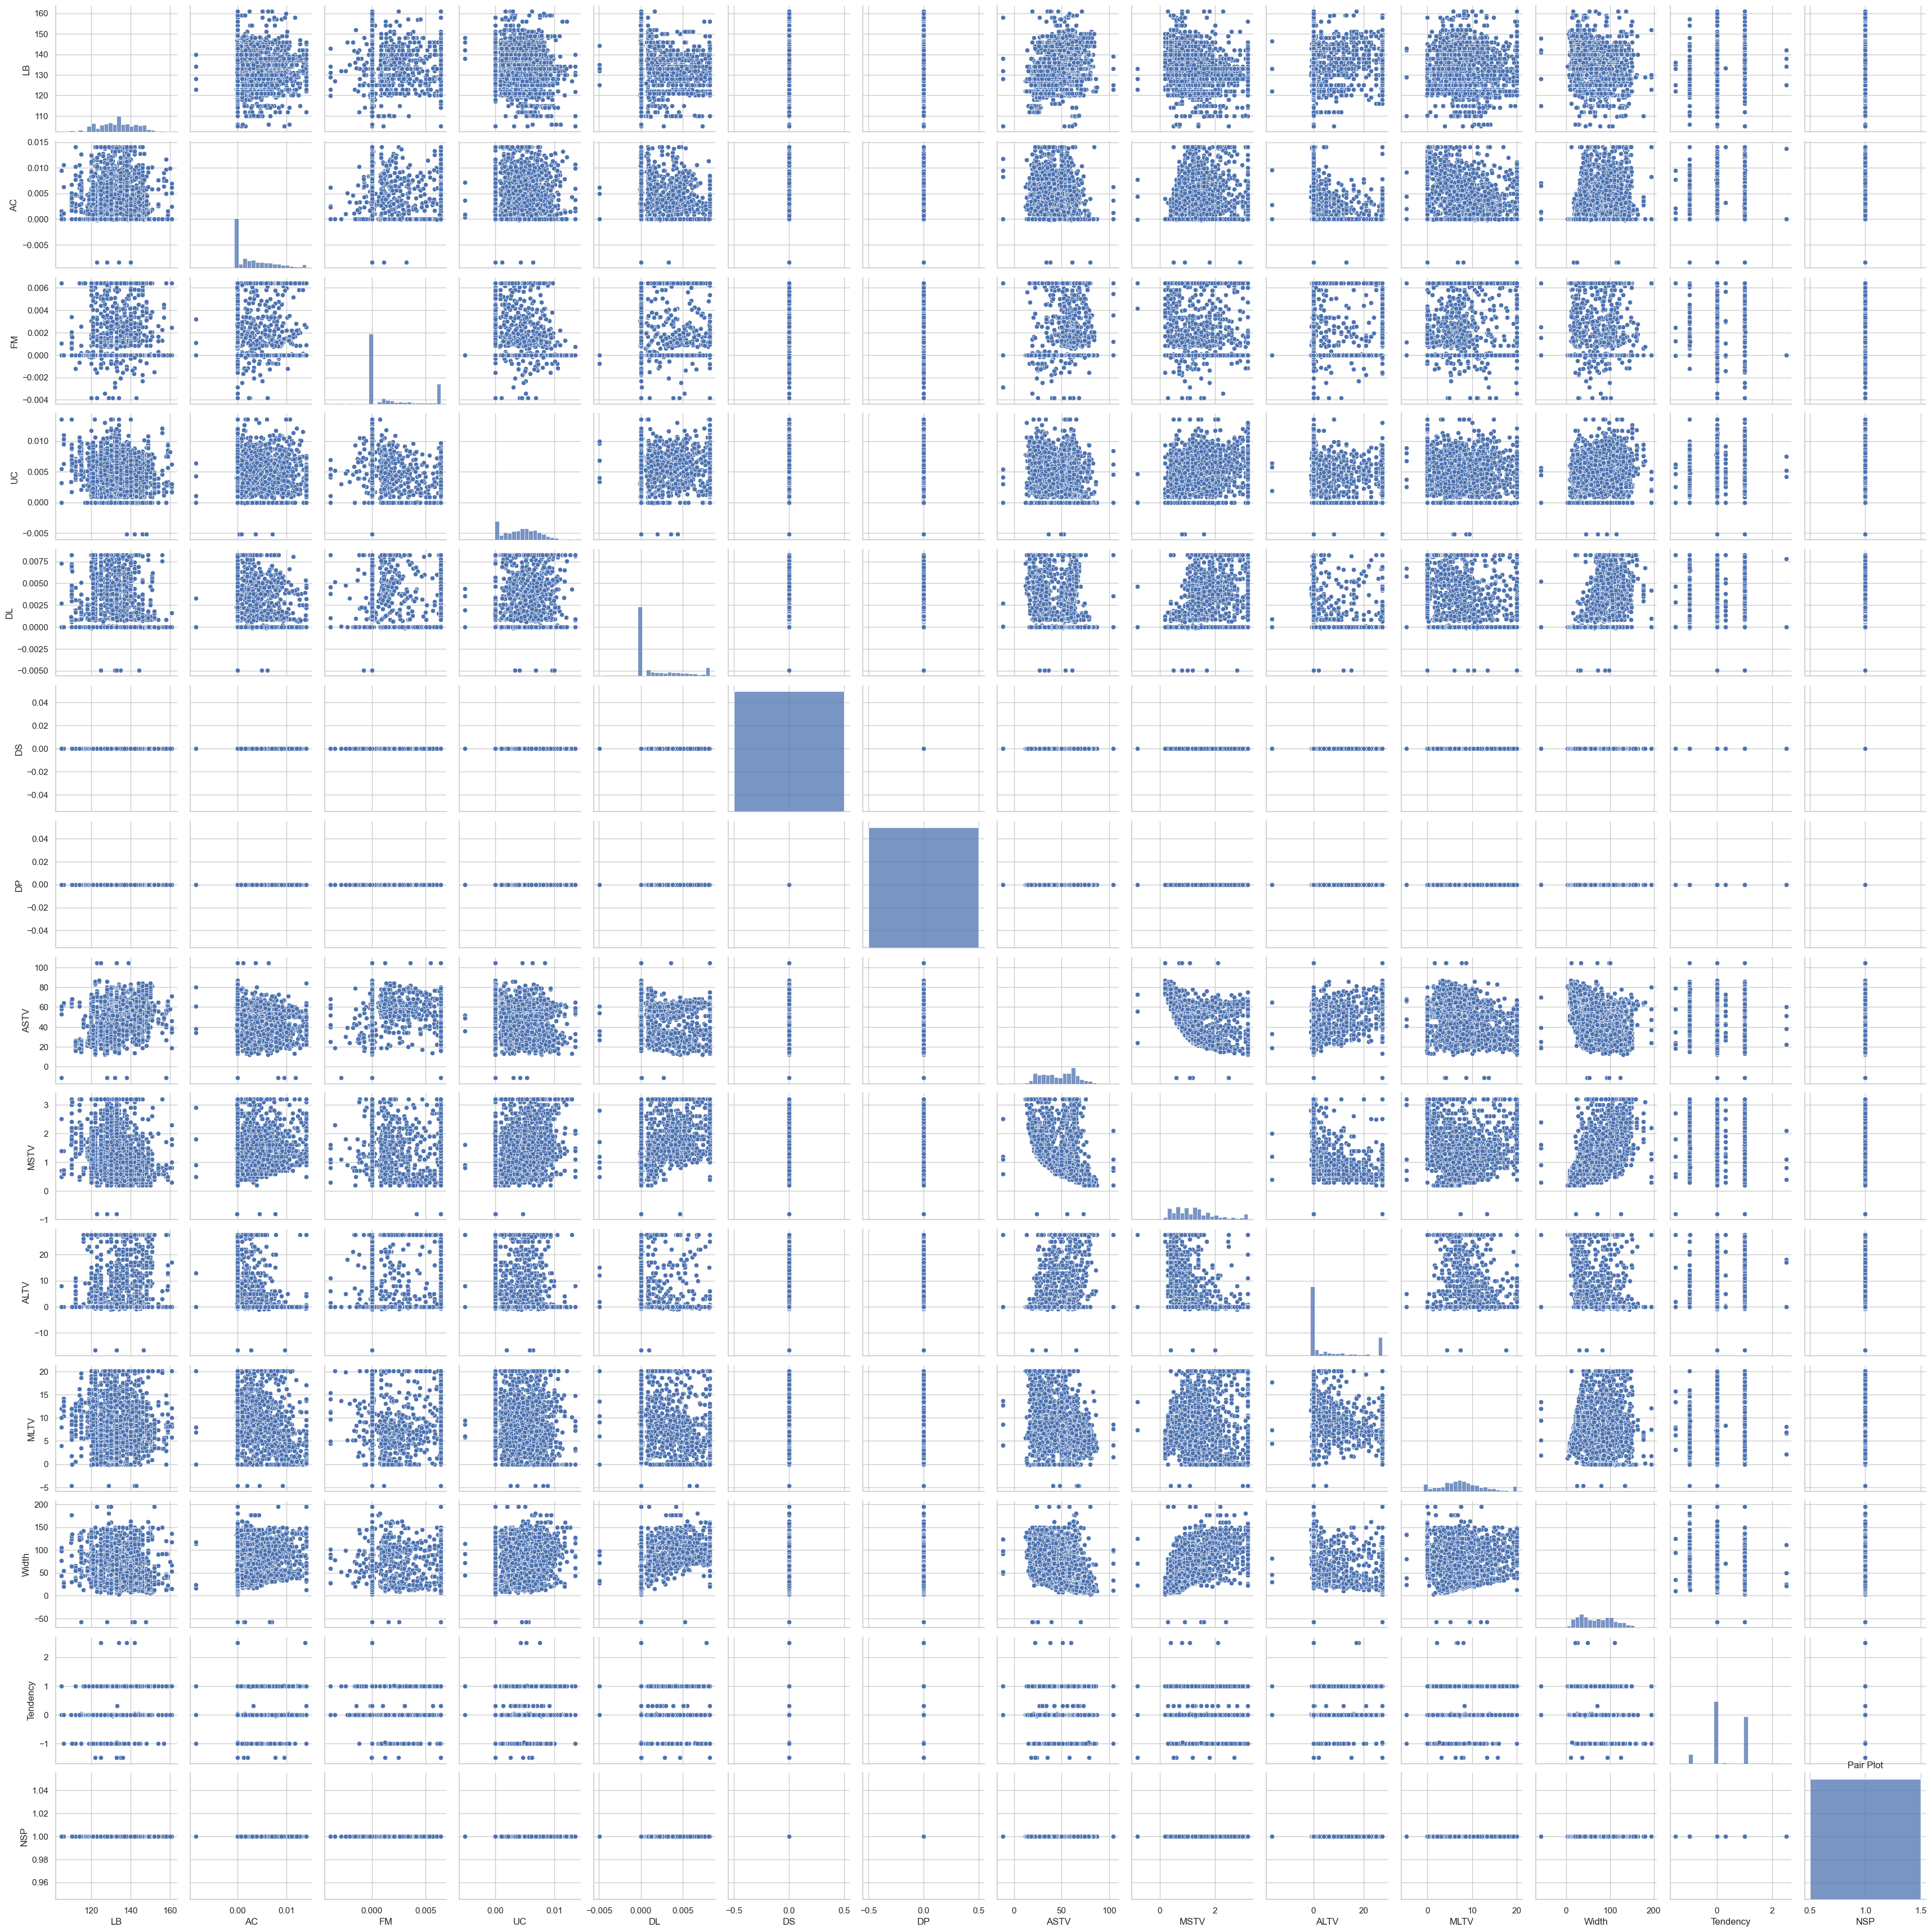

In [60]:
# Generate pair plots
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

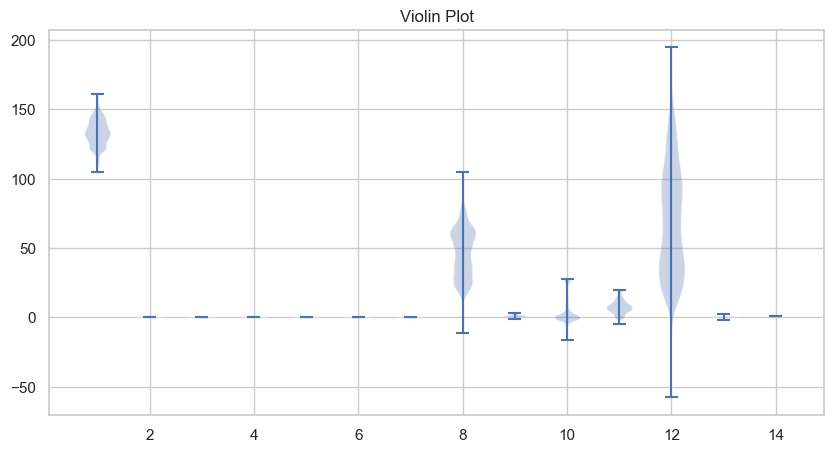

In [61]:
#Violin Plot
plt.figure(figsize=(10,5))
plt.violinplot(df)
plt.title('Violin Plot')
plt.show()

In [70]:
#Pattern Recognition
correlation_matrix = df.corr(numeric_only=True)
correlation_threshold = 0.5
high_correlation_vars = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix != 1)
for var1, var2 in high_correlation_vars.unstack().items():
    if var2:
        print(f"{var1[0]} and {var1[1]} have a high correlation of {correlation_matrix.loc[var1[0], var1[1]]}")

NameError: name 'correlation_matrix' is not defined

In [ ]:
#Insights

#1. No variable are strongly correlated to each other.
#2. MSTV and DL are also strongly correlated to width.
#3. No temporal column so we can't explore trends over time.
#4. Outliers in several numerical features.